In [1]:
import pandas as pd
data = pd.read_csv('predict_outcome.csv')

In [2]:
data.shape

(776503, 28)

In [3]:
data.isna().sum()

Unnamed: 0                   0
pitch_name                2082
release_speed             1768
events                       0
description                  0
p_throws                     0
type                         0
hit_distance_sc         586979
launch_speed            571142
launch_angle            571141
launch_speed_angle      637734
effective_speed           9627
pitch_number                 0
spin_rate_deprecated    776503
hit_location            600687
bb_type                 637726
release_spin_rate        29078
game_date                    0
pitch_number.1               0
vx0                       1835
vy0                       1835
vz0                       1835
ax                        1835
ay                        1835
az                        1835
pfx_x                     1835
pfx_z                     1835
bauer_units              29078
dtype: int64

In [4]:
#dropping unneeded columns
data.drop(columns=['Unnamed: 0', 'p_throws', 'type', 'pitch_number.1','game_date', 'bb_type', 'spin_rate_deprecated',\
                  'pitch_number','description' ],inplace = True)

In [5]:
#when hit distance, launch speed, and launch angle are null - should be zero
data

,pitch_name,release_speed,events,description,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,vz0,ax,ay,az,pfx_x,pfx_z,bauer_units
0,Cutter,90.4,out,hit_into_play,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.0650,-131.5120,-3.2980,-3.3340,27.8610,-30.5200,-0.394417,0.329000,27.090708
1,Slider,81.5,ball,ball,NaN,NaN,NaN,NaN,81.301,NaN,2293.0,-7.9400,-118.3900,-2.9300,-0.9770,18.7140,-31.7650,-0.224633,0.232967,28.134969
2,Curveball,77.1,ball,blocked_ball,NaN,NaN,NaN,NaN,75.063,NaN,2543.0,-6.2900,-112.1490,-2.4420,-4.2520,25.1530,-42.5170,-0.607342,-1.004000,32.983139
3,Cutter,87.6,strike,called_strike,NaN,NaN,NaN,NaN,86.856,NaN,2513.0,-5.7420,-127.4870,-2.0310,0.4720,27.3210,-28.6500,-0.089642,0.502433,28.687215
4,Cutter,86.2,strike,called_strike,NaN,NaN,NaN,NaN,86.030,NaN,2422.0,-6.8740,-125.3770,-2.6520,-1.3590,24.3800,-28.3090,-0.248292,0.539700,28.097448
5,4-Seam Fastball,91.8,ball,ball,NaN,NaN,NaN,NaN,90.941,NaN,2115.0,-9.2520,-133.4200,-2.6920,10.4440,31.3750,-19.8110,0.684125,1.187567,23.039216
6,Cutter,88.1,single,hit_into_play_no_out,60.0,89.1,3.0,2.0,87.526,9.0,2465.0,-5.2720,-128.2350,-2.3900,-1.4730,28.0230,-28.6660,-0.253858,0.498133,27.979569
7,Curveball,77.2,ball,ball,NaN,NaN,NaN,NaN,75.389,NaN,2514.0,-4.6200,-112.3640,-0.7270,-5.7530,24.9120,-42.3200,-0.771558,-0.973900,32.564767
8,Slider,80.0,ball,ball,NaN,NaN,NaN,NaN,78.974,NaN,NaN,-1.0720,-116.5000,-0.5600,-1.2300,22.3110,-35.8290,-0.255250,-0.189867,NaN
9,4-Seam Fastball,89.5,foul,foul,233.0,75.0,35.0,NaN,88.828,NaN,2438.0,-7.9270,-130.1040,-3.6470,3.1830,27.4530,-22.1590,0.128850,1.031333,27.240223


In [5]:
#instead of Nan going to put a zero for hit location
import numpy as np 
data.hit_location = np.where(data.hit_location.isnull(), 0, data.hit_location)
data.launch_speed = np.where(data.launch_speed.isnull(), 0, data.launch_speed)
data.launch_speed_angle = np.where(data.launch_speed_angle.isnull(), 0, data.launch_speed_angle)
data.hit_distance_sc = np.where(data.hit_distance_sc.isnull(), 0 , data.hit_distance_sc)
data.launch_angle = np.where(data.launch_angle.isnull(), 0, data.launch_angle)


In [6]:
data.isna().sum()

pitch_name             2082
release_speed          1768
events                    0
hit_distance_sc           0
launch_speed              0
launch_angle              0
launch_speed_angle        0
effective_speed        9627
hit_location              0
release_spin_rate     29078
vx0                    1835
vy0                    1835
vz0                    1835
ax                     1835
ay                     1835
az                     1835
pfx_x                  1835
pfx_z                  1835
bauer_units           29078
dtype: int64

In [7]:
#dont want to skew data with putitng in mean values 
data.dropna(inplace = True)

In [8]:
data.isna().sum()

pitch_name            0
release_speed         0
events                0
hit_distance_sc       0
launch_speed          0
launch_angle          0
launch_speed_angle    0
effective_speed       0
hit_location          0
release_spin_rate     0
vx0                   0
vy0                   0
vz0                   0
ax                    0
ay                    0
az                    0
pfx_x                 0
pfx_z                 0
bauer_units           0
dtype: int64

In [9]:
#dependent variable is: events
data.shape

(746575, 19)

In [10]:
#going to encode pitch_name
data = pd.concat([data,pd.get_dummies(data['pitch_name'], prefix='pitch')],axis=1)

In [12]:
data.drop(columns=['pitch_name'], inplace = True)

# Going to start testing model

In [14]:
test_data = data.loc[:730000:50]

In [16]:
#setting up X and y 
X = test_data.drop('events', axis =1)
y = test_data.events

In [81]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)
#train and test data
from sklearn.model_selection import train_test_split
X_scale_train, X_scale_test, y_train, y_test = train_test_split(X_scale, y, random_state=1)

,release_speed,hit_distance_sc,launch_speed,launch_angle,launch_speed_angle,effective_speed,hit_location,release_spin_rate,vx0,vy0,...,bauer_units,pitch_2-Seam Fastball,pitch_4-Seam Fastball,pitch_Changeup,pitch_Curveball,pitch_Cutter,pitch_Knuckle Curve,pitch_Sinker,pitch_Slider,pitch_Split Finger
0,90.4,256.0,79.1,22.0,4.0,90.193,7.0,2449.0,-7.0650,-131.5120,...,27.090708,0,0,0,0,1,0,0,0,0
51,93.9,0.0,0.0,0.0,0.0,93.758,0.0,2132.0,-7.2570,-136.3230,...,22.705005,0,0,0,0,0,0,1,0,0
102,95.9,0.0,0.0,0.0,0.0,95.619,0.0,2043.0,-7.6300,-139.4000,...,21.303441,0,0,0,0,0,0,1,0,0
154,96.0,0.0,0.0,0.0,0.0,95.083,0.0,2261.0,-10.5990,-139.2120,...,23.552083,1,0,0,0,0,0,0,0,0
207,91.1,0.0,0.0,0.0,0.0,90.593,0.0,2006.0,-7.9850,-132.4320,...,22.019759,1,0,0,0,0,0,0,0,0
259,96.8,365.0,106.1,24.0,0.0,95.104,0.0,2149.0,-12.7660,-140.2840,...,22.200413,1,0,0,0,0,0,0,0,0
311,86.8,377.0,98.0,34.0,5.0,84.496,9.0,2019.0,-7.2540,-126.1670,...,23.260369,0,0,1,0,0,0,0,0,0
362,95.1,0.0,0.0,0.0,0.0,94.496,0.0,2012.0,-3.9810,-138.4230,...,21.156677,0,0,0,0,0,0,1,0,0
412,91.8,0.0,0.0,0.0,0.0,89.653,0.0,2125.0,-3.5600,-133.4270,...,23.148148,0,1,0,0,0,0,0,0,0
464,95.3,0.0,0.0,0.0,0.0,95.755,0.0,2112.0,-6.0580,-138.4950,...,22.161595,0,0,0,0,0,0,1,0,0


In [15]:
#14,000 rows to test
test_data.shape

(14023, 27)

In [17]:
#train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class= 'multinomial', solver='newton-cg', C=1e5)
classifier

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [19]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
          warm_start=False)

In [20]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6408671674431872
Testing Data Score: 0.6303479749001711


In [26]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [29]:
results['Prediction'].value_counts()

ball        2263
out          505
foul         313
strike       284
single        75
home_run      35
double        31
Name: Prediction, dtype: int64

In [30]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

        ball       0.95      0.53      0.68      2263
      double       0.22      0.26      0.24        31
 field_error       0.00      0.00      0.00         0
        foul       0.49      0.97      0.65       313
hit_by_pitch       0.00      0.00      0.00         0
    home_run       1.00      0.97      0.99        35
         out       0.94      0.77      0.84       505
      single       0.38      0.76      0.51        75
      strike       0.23      0.79      0.36       284
      triple       0.00      0.00      0.00         0

   micro avg       0.63      0.63      0.63      3506
   macro avg       0.42      0.50      0.43      3506
weighted avg       0.83      0.63      0.67      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [31]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier(n_iter= 10)
SGD
SGD.fit(X_train,y_train)
SGD.score(X_test, y_test)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.3659440958357102

In [32]:
SGDpredict = SGD.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(SGDpredict, y_test))

              precision    recall  f1-score   support

        ball       0.00      0.00      0.00         0
      double       0.56      0.11      0.18       189
 field_error       0.00      0.00      0.00         0
        foul       0.00      0.00      0.00         0
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.00      0.00      0.00         0
         out       0.70      0.42      0.52       696
      single       0.00      0.00      0.00         0
      strike       1.00      0.37      0.54      2621
      triple       0.00      0.00      0.00         0

   micro avg       0.37      0.37      0.37      3506
   macro avg       0.23      0.09      0.12      3506
weighted avg       0.92      0.37      0.52      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
#trying gradient boosting
#definitely the best so far
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.7519254540268138


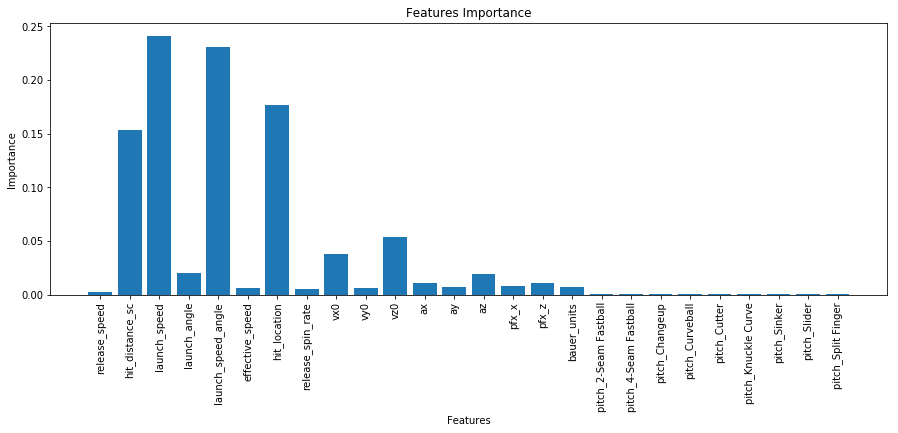

In [35]:
#might drop hit location
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [53]:
#going to try support vectors
#scores were lower with a balanced class weight
#this model is supposed to perform much better when scaling data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovr', class_weight= None)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
clf.score(X_train, y_train)

0.5415042312446515

In [55]:
clf.score(X_test, y_test)

0.5276668568168853

In [56]:
clf_predict = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(clf_predict, y_test))

              precision    recall  f1-score   support

        ball       0.99      0.49      0.65      2527
      double       0.00      0.00      0.00         1
 field_error       0.00      0.00      0.00         0
        foul       0.31      0.70      0.43       275
hit_by_pitch       0.00      0.00      0.00         0
    home_run       0.76      0.58      0.66        45
         out       0.83      0.61      0.70       568
      single       0.28      0.63      0.39        67
      strike       0.01      0.35      0.02        23
      triple       0.00      0.00      0.00         0

   micro avg       0.53      0.53      0.53      3506
   macro avg       0.32      0.34      0.28      3506
weighted avg       0.89      0.53      0.63      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [88]:
#SVM with scaled data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo', class_weight= None)
clf.fit(X_scale_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [89]:
clf.score(X_scale_train, y_train)

0.6305029951507084

In [90]:
clf_predict = clf.predict(X_scale_test)
from sklearn.metrics import classification_report
print(classification_report( y_test, clf_predict))

              precision    recall  f1-score   support

        ball       0.53      0.97      0.68      1253
      double       0.00      0.00      0.00        36
 field_error       0.00      0.00      0.00         5
        foul       0.97      0.48      0.65       628
hit_by_pitch       0.00      0.00      0.00         6
    home_run       0.97      1.00      0.99        34
         out       0.68      1.00      0.81       414
      single       1.00      0.02      0.04       150
      strike       0.86      0.22      0.35       972
      triple       0.00      0.00      0.00         8

   micro avg       0.62      0.62      0.62      3506
   macro avg       0.50      0.37      0.35      3506
weighted avg       0.73      0.62      0.56      3506



/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
#trying to get feature imporance for SVM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()



IndexError: index 212 is out of bounds for axis 1 with size 31

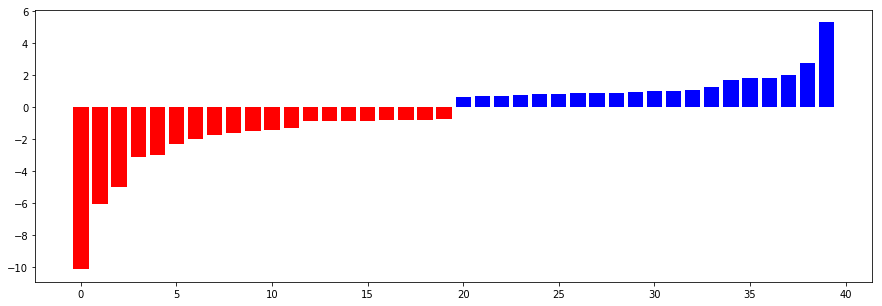

In [83]:
#need to scale the data for this to work
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
cv = CountVectorizer()
cv.fit(test_data)
svm =svm.LinearSVC()
svm.fit(X_scale_train, y_train)
plot_coefficients(svm, cv.get_feature_names())

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

IndexError: index 188 is out of bounds for axis 1 with size 31

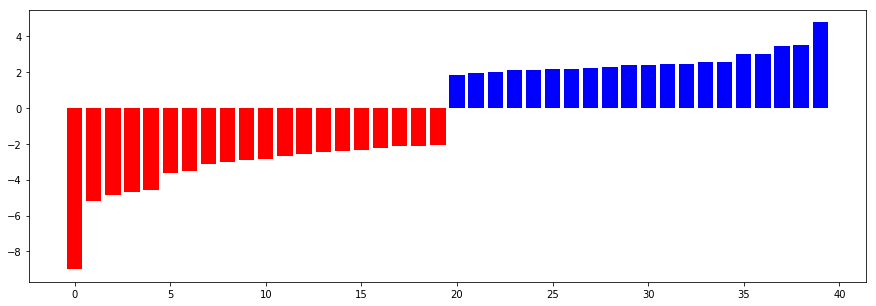

In [98]:
#can't plot
from sklearn import svm
features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X_scale_train, y_train)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(test_data)

import matplotlib.pyplot as plt
def plot_coefficients(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()
    
plot_coefficients(svm, cv.get_feature_names())

In [92]:
f_importances(svm.coef_, features_names)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()